## Imports and setup

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle as pkl

from tensorflow.examples.tutorials.mnist import input_data

import h5py

import scipy.io
from PIL import Image

In [2]:
def plot_image_grid(images_files):
    fig = plt.figure(figsize=(8,8))
    images = [img for img in images_files]
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4,4,4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

# MNIST overview

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
The training set is:
(55000, 784)
The validation set is:
(5000, 784)
Reshape image
(28, 28)


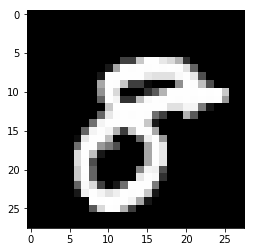

In [3]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
print("The training set is:")
print(mnist.train.images.shape)
print("The validation set is:")
print(mnist.validation.images.shape)

# De-flatten
one_image_mnist = np.reshape(mnist.train.images[29],[28,28])
print("Reshape image")
print(one_image_mnist.shape)

plt.imshow(one_image_mnist, cmap="Greys_r")

# USPS Overview

Training values shape
(7291, 256)
Training labels shape
(7291,)
Testing values shape
(2007, 256)
Testing labels shape
(2007,)
Reshape image
(16, 16)


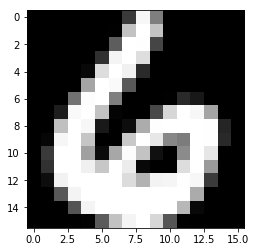

In [4]:
path = "Datasets/usps/usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]
print("Training values shape")
print(X_tr.shape)
print("Training labels shape")
print(y_tr.shape)
print("Testing values shape")
print(X_te.shape)
print("Testing labels shape")
print(y_te.shape)

one_img_usps = np.reshape(X_tr[0],[16,16])
print("Reshape image")
print(one_img_usps.shape)

plt.imshow(one_img_usps, cmap="Greys_r")

# SVHN Overview

Raw Data Test
(32, 32, 3, 26032)
Raw Data Train
(32, 32, 3, 73257)
Reshape image
(32, 32, 3)


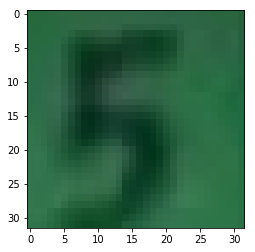

In [5]:
svhn_file = "Datasets/svhn/test_32x32.mat"
svhn_file_train = "Datasets/svhn/train_32x32.mat"
mat = scipy.io.loadmat(svhn_file)
mat_train = scipy.io.loadmat(svhn_file_train)
print("Raw Data Test")
print(mat['X'].shape)
print("Raw Data Train")
print(mat_train['X'].shape)
#svhn_data = np.reshape(mat['X'],[32,32])
one_img_svhn = mat['X'][:,:,:,0]
print("Reshape image")
print(one_img_svhn.shape)
#data = np.zeros((32,32,3),dtype=np.uint8)
#data[32,32] = mat['X'][:][:][:][0]

plt.imshow(one_img_svhn)

# SynthDigits Overview

Raw Data Test
(32, 32, 3, 9553)
Raw Data Train
(32, 32, 3, 479400)
Reshape image
(32, 32, 3)


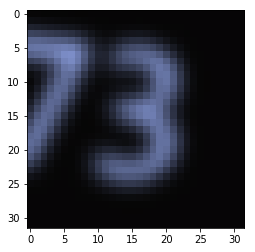

In [6]:
synth_file = "Datasets/SynthDigits/synth_test_32x32.mat"
synth_file_train = "Datasets/SynthDigits/synth_train_32x32.mat"
synthmat = scipy.io.loadmat(synth_file)
synthmat_train = scipy.io.loadmat(synth_file_train)
print("Raw Data Test")
print(synthmat['X'].shape)
print("Raw Data Train")
print(synthmat_train['X'].shape)

one_img_synth = synthmat['X'][:,:,:,0]
print("Reshape image")
print(one_img_synth.shape)
#data = np.zeros((32,32,3),dtype=np.uint8)
#data[32,32] = mat['X'][:][:][:][0]

plt.imshow(one_img_synth)

# MNIST M

(55000, 28, 28, 3)
(10000, 28, 28, 3)
(5000, 28, 28, 3)


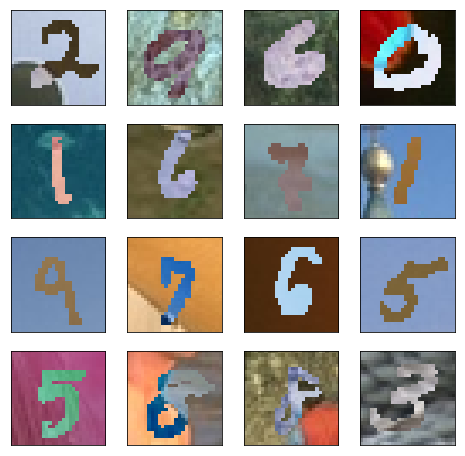

In [7]:
mnistm = pkl.load(open('mnistm_data.pkl', 'rb'))
mnistm_train = mnistm['train']
mnistm_test = mnistm['test']
mnistm_valid = mnistm['valid']

print(mnistm_train.shape)
print(mnistm_test.shape)
print(mnistm_valid.shape)

plot_image_grid(mnistm_train[16:32])

# Super Nova DataSet

(100000, 21, 21, 3)


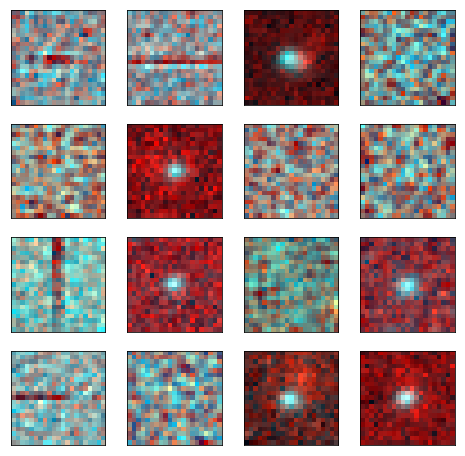

{0, 1}


In [8]:
supernova = pkl.load(open('./Datasets/Datael4106/resnet_supernovae.pkl', 'rb'))
supernova.keys()
supernova_example = supernova['images'][3]
print(supernova['images'].shape)
plot_image_grid(supernova['images'][16:32])
labelSet = set()
for i in range(supernova['labels'].shape[0]):
    labelSet.add(supernova['labels'][i])
print(labelSet)
#print(supernova['images'][0])

dict_keys(['images', 'labels'])
(15000, 21, 21, 3)


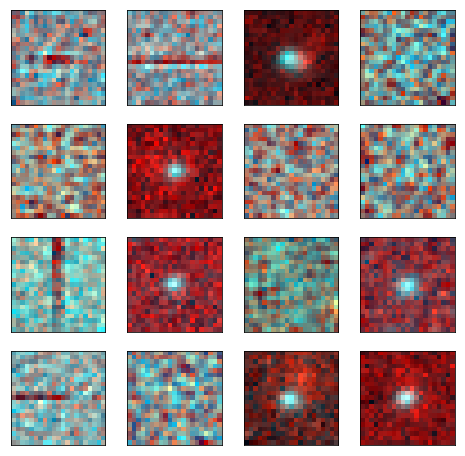

(15000,)


In [9]:
source_el = pkl.load(open('./Datasets/Datael4106/source_domain.pkl', 'rb'))
print(source_el.keys())
print(source_el['images'].shape)
plot_image_grid(source_el['images'][16:32])
print(source_el['labels'].shape)

dict_keys(['images', 'labels'])
(14584, 21, 21, 3)


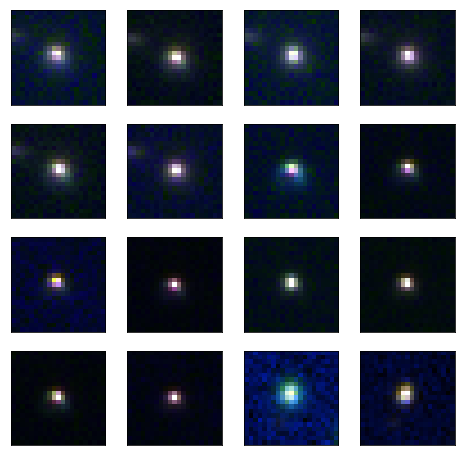

(14584,)


In [10]:
target_el = pkl.load(open('./Datasets/Datael4106/target_domain.pkl', 'rb'))
print(target_el.keys())
print(target_el['images'].shape)
plot_image_grid(target_el['images'][16:32])
print(target_el['labels'].shape)

In [35]:
target_el_mean = target_el['images'].mean((0,1,2))

In [ ]:
print(target_el_mean)
print(target_el_mean.shape)
np.zeros(3).shape

In [40]:
source_el['images'][0]


array([[[0.560496  , 0.37406415, 0.3950251 ],
        [0.3339977 , 0.27032503, 0.42894432],
        [0.30712378, 0.68516254, 0.7203097 ],
        ...,
        [0.57581156, 0.41302338, 0.41422057],
        [0.47703785, 0.23237343, 0.33792198],
        [0.6813221 , 0.37194028, 0.338275  ]],

       [[0.5231465 , 0.16846873, 0.27382204],
        [0.5903693 , 0.29497877, 0.32814664],
        [0.8582037 , 0.5804676 , 0.39756417],
        ...,
        [0.6562874 , 0.1907761 , 0.22786835],
        [0.61898386, 0.0473007 , 0.14843234],
        [0.7386309 , 0.39256647, 0.3259108 ]],

       [[0.33540946, 0.1145761 , 0.32352573],
        [0.37509748, 0.4971237 , 0.56269366],
        [0.6136236 , 0.8126076 , 0.66570795],
        ...,
        [0.8534681 , 0.3743389 , 0.2610698 ],
        [0.6439639 , 0.14036092, 0.19959654],
        [0.2895838 , 0.43347865, 0.559033  ]],

       ...,

       [[0.4183192 , 0.49972218, 0.54465216],
        [0.45176956, 0.34459114, 0.42498007],
        [0.6830043 , 0